In [151]:
import numpy as np
import seaborn as sns
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [152]:
image = cv2.imread(r"F:\Techie_Classifier\model\Test_images\priyaLakhani1.png")
image.shape

(333, 333, 3)

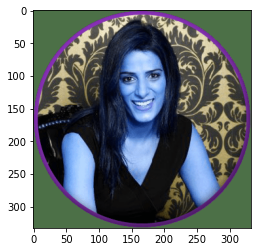

In [153]:
plt.imshow(image)

In [154]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gray.shape

(333, 333)

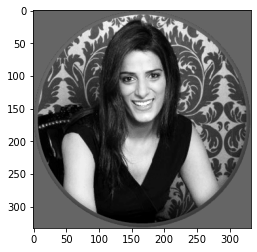

In [155]:
plt.imshow(gray, cmap='gray')

In [156]:
face_cascade = cv2.CascadeClassifier(r"F:\Techie_Classifier\model\Opencv\haarcascades\haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(r"F:\Techie_Classifier\model\Opencv\haarcascades\haarcascade_eye.xml")

In [157]:
faces = face_cascade.detectMultiScale(gray,1.3,5)
faces


array([[120,  69,  93,  93]])

In [158]:
(x,y,w,h) = faces[0]
(x,y,w,h)

(120, 69, 93, 93)

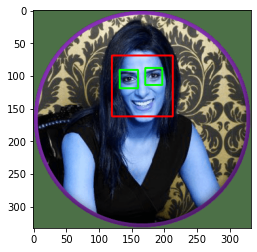

In [159]:
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = face_img[y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_gray,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()


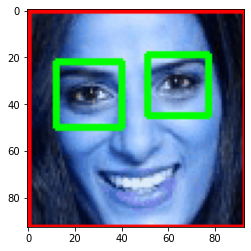

In [160]:
%matplotlib inline
plt.imshow(roi_gray,cmap='gray')

In [161]:
cropped_image = np.array(roi_gray)
cropped_image.shape

(93, 93, 3)

In [162]:
import numpy as np
import pywt
import cv2

def w2d(image , mode='haar' , level=1):
    array = image
    array = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    array = np.float32(array)
    array /= 255
    
    coeff = pywt.wavedec2(array, mode, level=level)
    new_coeff = list(coeff)  
    new_coeff[0] *= 0
    
    new_array  = pywt.waverec2(new_coeff, mode);
    new_array *= 255;
    new_array  =  np.uint8(new_array)

    return new_array
    
    

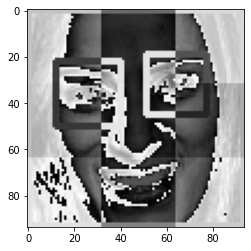

In [163]:
feature = w2d(cropped_image , 'db1', 5)
plt.imshow(feature, cmap='gray')

In [164]:
def get_cropped_image_if_2_eyes(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = image[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

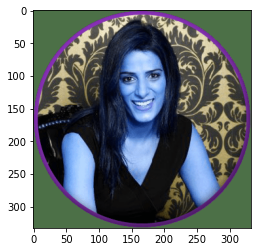

In [165]:
original_image = cv2.imread(r"F:\Techie_Classifier\model\Test_images\priyaLakhani1.png")
plt.imshow(original_image)

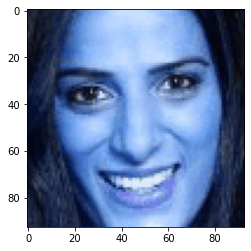

In [166]:
cropped = get_cropped_image_if_2_eyes(r"F:\Techie_Classifier\model\Test_images\priyaLakhani1.png")
plt.imshow(cropped)

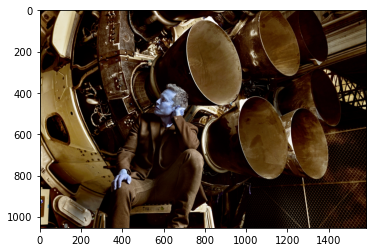

In [167]:
org_image_obstructed = cv2.imread(r"F:\Techie_Classifier\model\Test_images\elonmusk.jpg")
plt.imshow(org_image_obstructed)

In [168]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes(r"F:\Techie_Classifier\model\Test_images\elonmusk.jpg")
cropped_image_no_2_eyes

In [169]:
path_to_data = "F:/Techie_Classifier/model/Dataset/"
path_to_cr_data = "F:/Techie_Classifier/model/Dataset/cropped/"

In [170]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [171]:
img_dirs

['F:/Techie_Classifier/model/Dataset/cropped',
 'F:/Techie_Classifier/model/Dataset/ElonMusk',
 'F:/Techie_Classifier/model/Dataset/JeffBezos',
 'F:/Techie_Classifier/model/Dataset/lisaSu',
 'F:/Techie_Classifier/model/Dataset/MarkZuckerberg',
 'F:/Techie_Classifier/model/Dataset/PriyaLakhani',
 'F:/Techie_Classifier/model/Dataset/SatyaNadella',
 'F:/Techie_Classifier/model/Dataset/SundarPichai']

In [172]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [173]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs: # loop through the images
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        try:
            roi_color = get_cropped_image_if_2_eyes(entry.path)
        except:
            continue 
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name # create sub-folders in the target folder
            if not os.path.exists(cropped_folder): # if no such folder, create it
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color) # save the file in the path
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path) # create a dictionary with all the paths
            count += 1   

cropped
ElonMusk
Generating cropped images in folder:  F:/Techie_Classifier/model/Dataset/cropped/ElonMusk
JeffBezos
Generating cropped images in folder:  F:/Techie_Classifier/model/Dataset/cropped/JeffBezos
lisaSu
Generating cropped images in folder:  F:/Techie_Classifier/model/Dataset/cropped/lisaSu
MarkZuckerberg
Generating cropped images in folder:  F:/Techie_Classifier/model/Dataset/cropped/MarkZuckerberg
PriyaLakhani
Generating cropped images in folder:  F:/Techie_Classifier/model/Dataset/cropped/PriyaLakhani
SatyaNadella
Generating cropped images in folder:  F:/Techie_Classifier/model/Dataset/cropped/SatyaNadella
SundarPichai
Generating cropped images in folder:  F:/Techie_Classifier/model/Dataset/cropped/SundarPichai


In [174]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'ElonMusk': ['F:/Techie_Classifier/model/Dataset/cropped/ElonMusk\\ElonMusk1.png',
  'F:/Techie_Classifier/model/Dataset/cropped/ElonMusk\\ElonMusk10.png',
  'F:/Techie_Classifier/model/Dataset/cropped/ElonMusk\\ElonMusk11.png',
  'F:/Techie_Classifier/model/Dataset/cropped/ElonMusk\\ElonMusk12.png',
  'F:/Techie_Classifier/model/Dataset/cropped/ElonMusk\\ElonMusk13.png',
  'F:/Techie_Classifier/model/Dataset/cropped/ElonMusk\\ElonMusk14.png',
  'F:/Techie_Classifier/model/Dataset/cropped/ElonMusk\\ElonMusk15.png',
  'F:/Techie_Classifier/model/Dataset/cropped/ElonMusk\\ElonMusk16.png',
  'F:/Techie_Classifier/model/Dataset/cropped/ElonMusk\\ElonMusk17.png',
  'F:/Techie_Classifier/model/Dataset/cropped/ElonMusk\\ElonMusk18.png',
  'F:/Techie_Classifier/model/Dataset/cropped/ElonMusk\\ElonMusk19.png',
  'F:/Techie_Classifier/model/Dataset/cropped/ElonMusk\\ElonMusk2.png',
  'F:/Techie_Classifier/model/Dataset/cropped/ElonMusk\\ElonMusk20.png',
  'F:/Techie_Classifier/model/Dataset/cro

In [175]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'ElonMusk': 0,
 'JeffBezos': 1,
 'lisaSu': 2,
 'MarkZuckerberg': 3,
 'PriyaLakhani': 4,
 'SatyaNadella': 5,
 'SundarPichai': 6}

In [179]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        image = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(image, (32, 32))
        feature = w2d(image,'db1',5)
        scalled_feature = cv2.resize(feature, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_feature.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])  

In [180]:
len(X[0])

4096

In [181]:
X[0]

array([[216],
       [216],
       [232],
       ...,
       [  0],
       [  1],
       [254]], dtype=uint8)

In [182]:
y[0]

0

In [183]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(389, 4096)

In [184]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7448979591836735

In [188]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.53      0.65        19
           1       0.86      0.60      0.71        20
           2       0.73      0.96      0.83        25
           3       0.56      0.75      0.64        12
           4       1.00      0.86      0.92         7
           5       0.50      0.40      0.44         5
           6       0.77      1.00      0.87        10

    accuracy                           0.74        98
   macro avg       0.75      0.73      0.72        98
weighted avg       0.77      0.74      0.74        98



In [189]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [190]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [191]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df


,model,best_score,best_params
0,svm,0.773290,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.567037,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.804091,{'logisticregression__C': 5}


In [192]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=5, solver='liblinear'))])}

In [193]:
best_estimators['svm'].score(X_test,y_test)

0.8571428571428571

In [194]:
best_estimators['random_forest'].score(X_test,y_test)

0.6428571428571429

In [195]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7857142857142857

In [196]:
best_clf = best_estimators['svm']

In [197]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[14,  1,  2,  2,  0,  0,  0],
       [ 4, 16,  0,  0,  0,  0,  0],
       [ 2,  1, 22,  0,  0,  0,  0],
       [ 0,  2,  0, 10,  0,  0,  0],
       [ 0,  0,  0,  0,  7,  0,  0],
       [ 0,  0,  0,  0,  0,  5,  0],
       [ 0,  0,  0,  0,  0,  0, 10]], dtype=int64)

Text(69.0, 0.5, 'Truth')

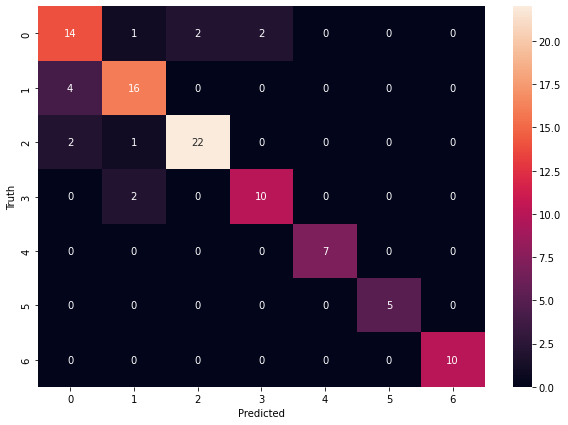

In [198]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [199]:
class_dict

{'ElonMusk': 0,
 'JeffBezos': 1,
 'lisaSu': 2,
 'MarkZuckerberg': 3,
 'PriyaLakhani': 4,
 'SatyaNadella': 5,
 'SundarPichai': 6}

In [203]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'techie_model.pkl')

['techie_model.pkl']

In [204]:
import json
with open("TechieClass_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))